In [2]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score, recall_score,f1_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Task 1
# Load the Datasets

In [3]:
df1 = pd.read_csv('Fraud_Data.csv')
df2 = pd.read_csv('IpAddress_to_Country.csv')
df3 = pd.read_csv('creditcard.csv')

In [ ]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
df2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
df3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA
# Data Overview and Summary

In [ ]:
def summarize_data(df):
    # Basic Information
    def basic_info(df):
        print(df.info())
        print(df.describe(include='all'))
        print(df.isnull().sum())

    # Specific Summarizations
    def specific_summarizations(df):
        num_records = df.shape[0]
        num_unique_values = df.nunique()

        print(f'Number of records: {num_records}')
        print('Number of unique values per column:')
        print(num_unique_values)

        for column in df.columns:
            if df[column].dtype == 'object':
                print(f'\nTop 5 most frequent values in column "{column}":')
                print(df[column].value_counts().head())
            elif df[column].dtype in ['int64', 'float64']:
                total = df[column].sum()
                mean = df[column].mean()
                print(f'\nTotal of column "{column}": {total}')
                print(f'Mean of column "{column}": {mean:.2f}')

                if pd.to_datetime(df[column], errors='coerce').notnull().all():
                    df[column] = pd.to_datetime(df[column])
                    messages_per_period = df[column].dt.to_period('M').value_counts().sort_index()
                    print(f'\nNumber of records per month for column "{column}":')
                    print(messages_per_period)

        numeric_columns = df.select_dtypes(include=['number']).columns
        if not numeric_columns.empty:
            top_messages = df.nlargest(5, numeric_columns[0])
            print('\nTop 5 records by the first numerical column:')
            print(top_messages)
        else:
            print('\nNo numerical columns to display top records.')


    # Calling functions
    print("Basic Information:")
    basic_info(df)
    print("\nSpecific Summarizations:")
    specific_summarizations(df)

In [ ]:
summarize_data(df1)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None
              user_id          signup_time        purchase_time  \
count   151112.000000               151112               151112   
unique            NaN               151112               150679   
top

# Handle Missing Values
Has no missing values so no imputation needed

# Data Cleaning

In [4]:
# Remove duplicates
df1.drop_duplicates(inplace=True)

In [5]:
# Correct data types
# Convert columns to respective data types
df1['signup_time'] = pd.to_datetime(df1['signup_time'])
df1['purchase_time'] = pd.to_datetime(df1['purchase_time'])
df1['user_id'] = df1['user_id'].astype(str)
df1['device_id'] = df1['device_id'].astype(str)
df1['source'] = df1['source'].astype(str)
df1['browser'] = df1['browser'].astype(str)
df1['sex'] = df1['sex'].astype(str)
df1['ip_address'] = df1['ip_address'].astype(float)
df1['purchase_value'] = df1['purchase_value'].astype(float)
df1['age'] = df1['age'].astype(int)
df1['class'] = df1['class'].astype(int)

print(df1.dtypes)
df1.head()

user_id                   object
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value           float64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


# Univariate analysis

In [6]:
def univariate_analysis(df):
    def analyze_column(column):
        print(f"Analysis for column: {column.name}")

        # Visualization
        plt.figure(figsize=(10, 6))

        if pd.api.types.is_numeric_dtype(column):
            sns.histplot(column, kde=True, bins=30)
            plt.title(f'Histogram of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
        elif pd.api.types.is_datetime64_any_dtype(column):
            column.value_counts().sort_index().plot(kind='line')
            plt.title(f'Time Series of {column.name}')
            plt.xlabel('Date')
            plt.ylabel('Frequency')
        else:
            # Limiting to top 20 categories to avoid clutter
            value_counts = column.value_counts()
            top_categories = value_counts[:20]
            top_categories.plot(kind='bar')
            plt.title(f'Bar Plot of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
            if len(value_counts) > 20:
                plt.title(f'Bar Plot of {column.name} (Top 20 categories)')
                plt.xlabel(f'{column.name} (Top 20)')
                plt.ylabel('Frequency')

        plt.show()
        print("\n\n")

    # Sampling the data if too large
    if len(df) > 10000:
        df_sample = df.sample(10000)
    else:
        df_sample = df

    for column in df_sample.columns:
        analyze_column(df_sample[column])

Analysis for column: user_id


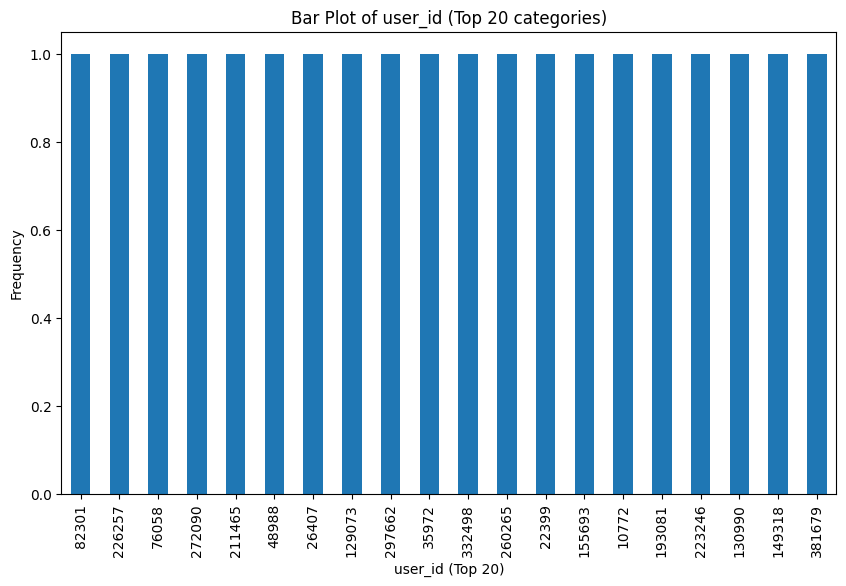




Analysis for column: signup_time


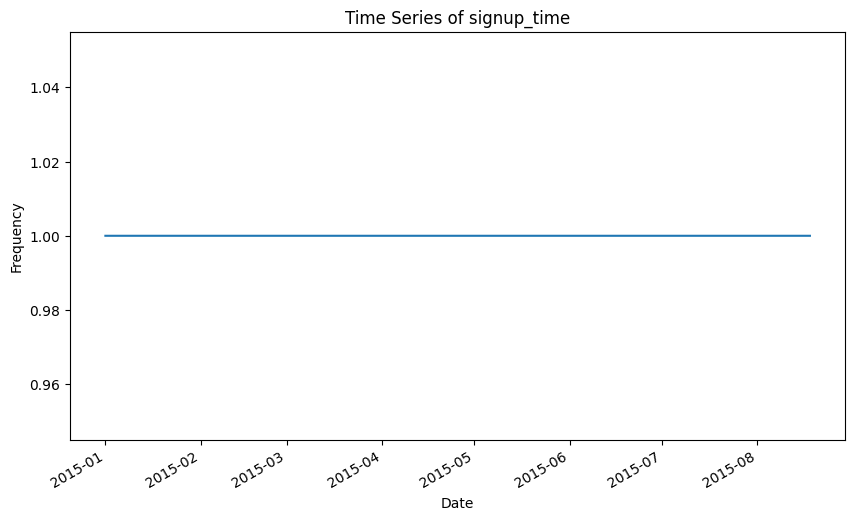




Analysis for column: purchase_time


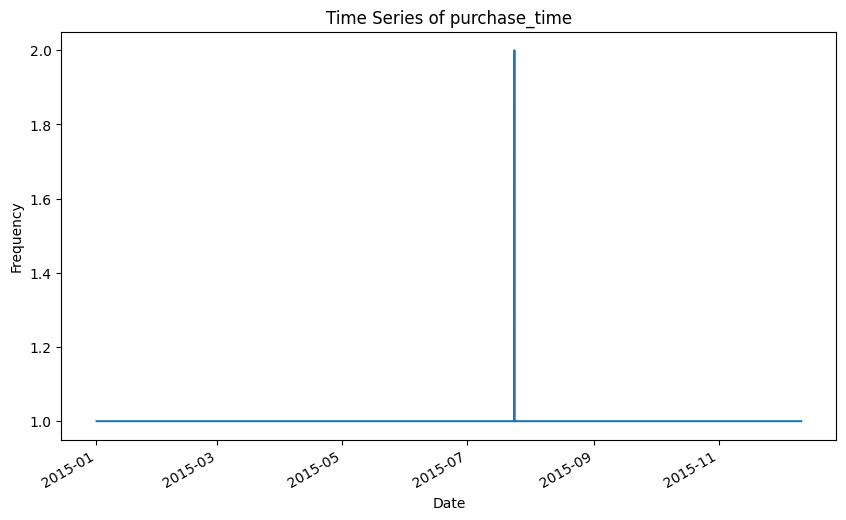




Analysis for column: purchase_value


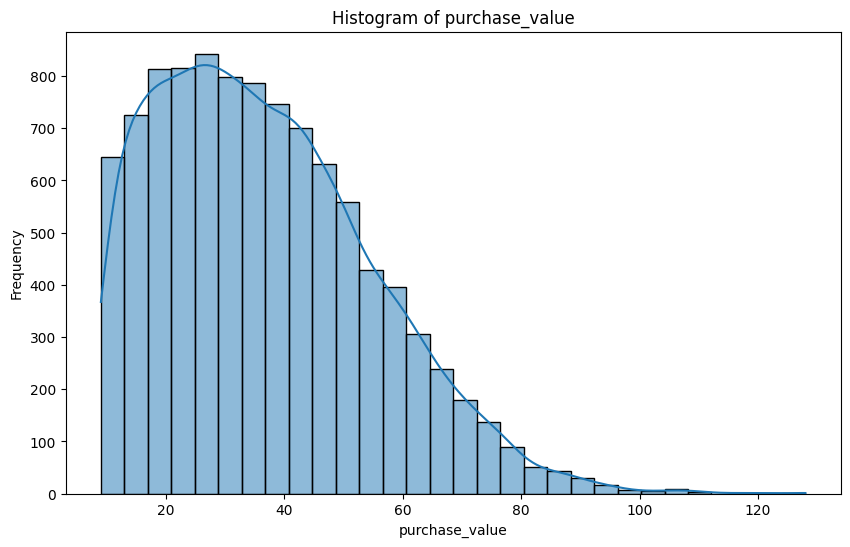




Analysis for column: device_id


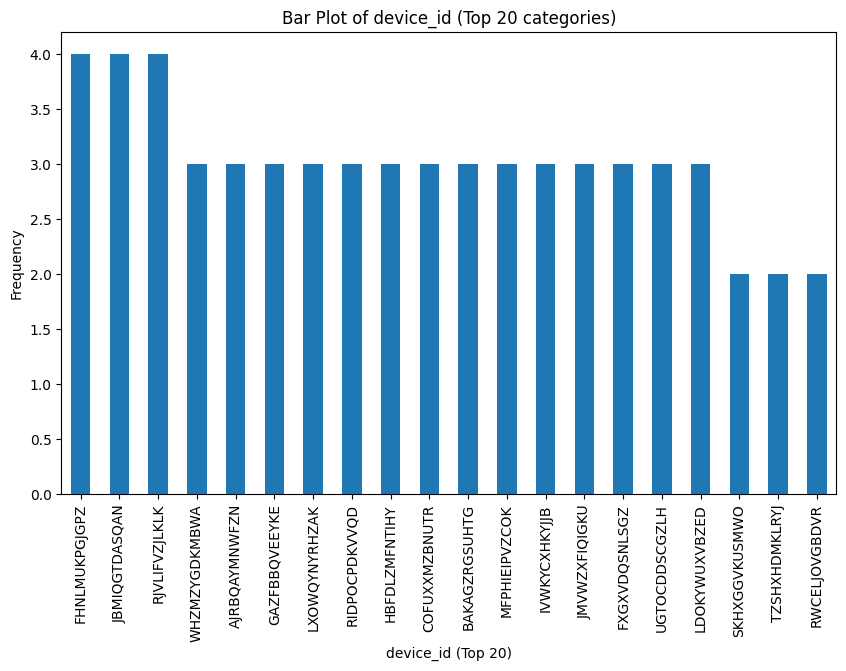




Analysis for column: source


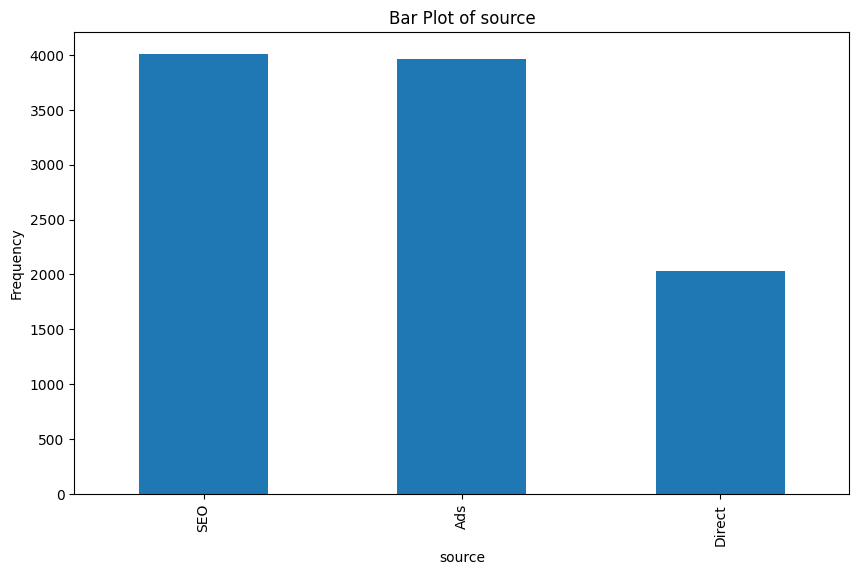




Analysis for column: browser


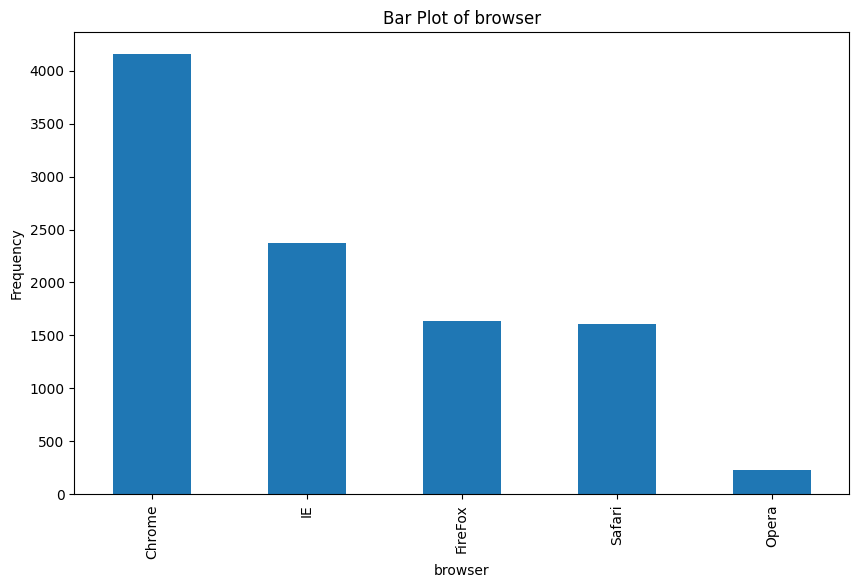




Analysis for column: sex


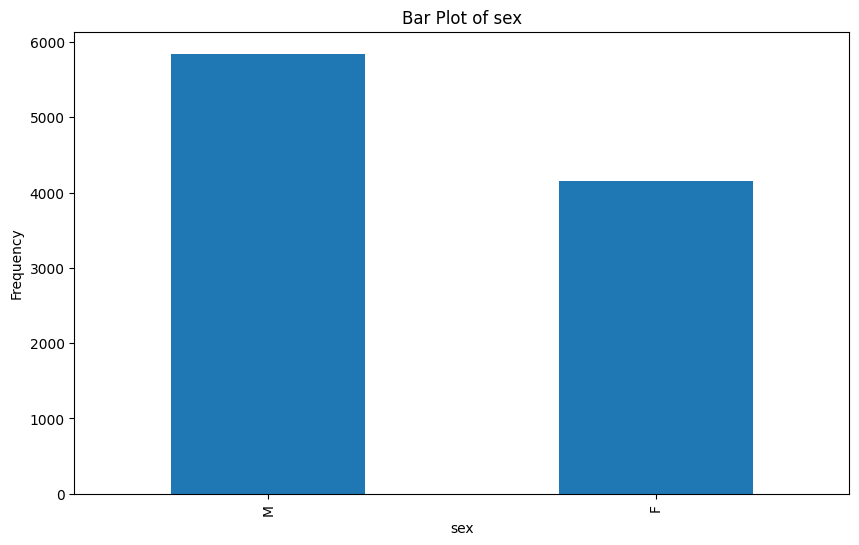




Analysis for column: age


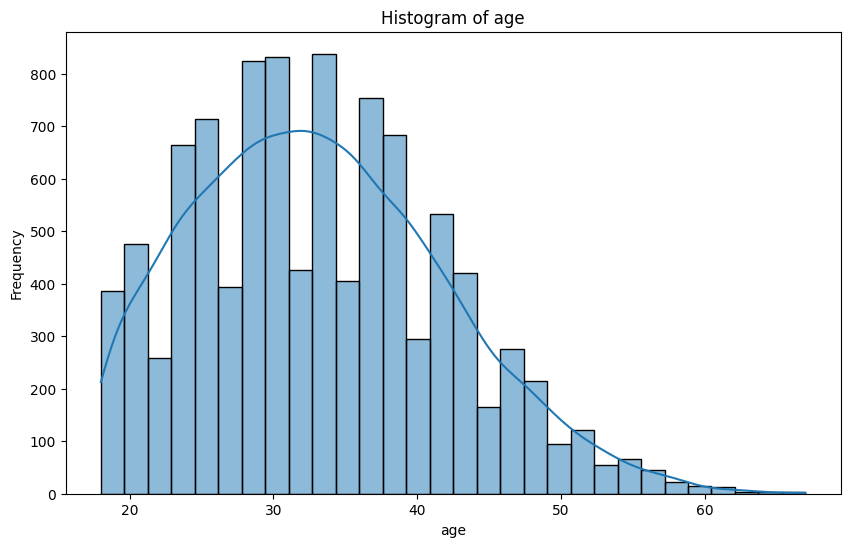




Analysis for column: ip_address


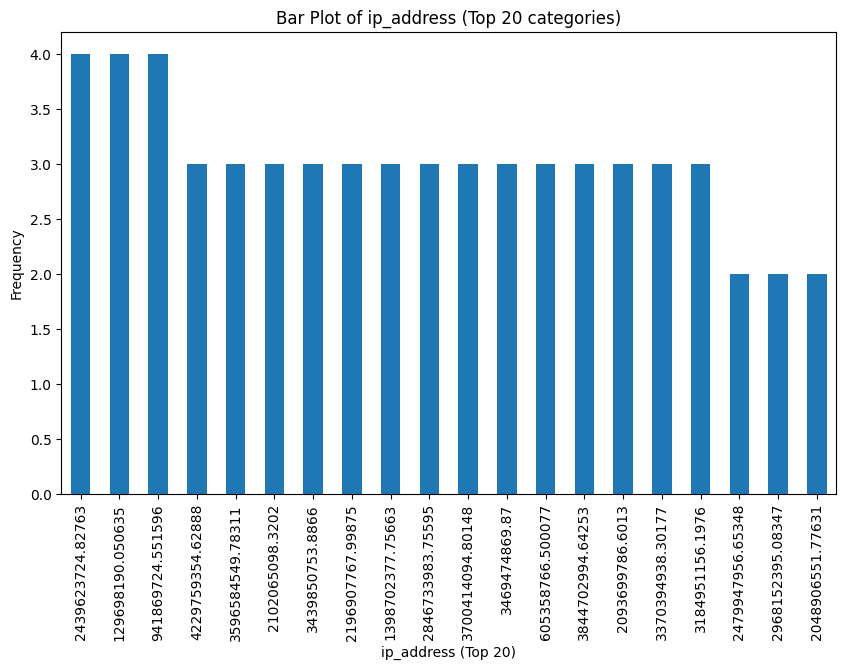




Analysis for column: class


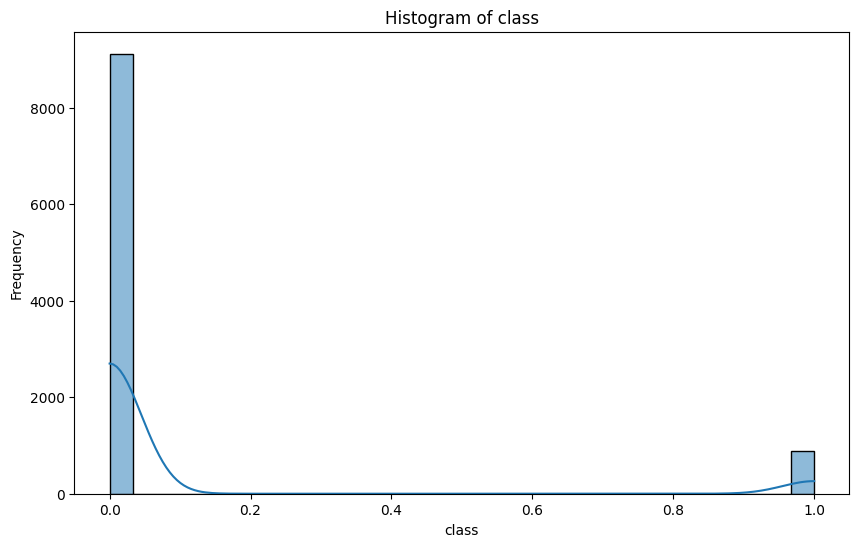

In [ ]:
univariate_analysis(df1)

# Bivariate Analysis

In [ ]:
#Analyze the relationship between each feature and the target variable - Churn

def plot_box_violin(df, column, target, plot_type='box'):
    plt.figure(figsize=(10, 6))
    if plot_type == 'box':
        sns.boxplot(x=target, y=column, data=df)
        plt.title(f'Box Plot of {column} by {target}')
    elif plot_type == 'violin':
        sns.violinplot(x=target, y=column, data=df)
        plt.title(f'Violin Plot of {column} by {target}')
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()

def plot_count_stacked_bar(df, column, target):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue=target, data=df, palette='viridis')
    plt.title(f'Count Plot of {column} by {target}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

def plot_stacked_bar_chart(df, column, target):
    crosstab = pd.crosstab(df[column], df[target])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Stacked Bar Chart of {column} by {target}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [ ]:
def plot_box_violin_sample(df, column, target, plot_type='box', sample_size=1000):
    if len(df) > sample_size:
        df = df.sample(sample_size)
    plot_box_violin(df, column, target, plot_type)

def plot_count_stacked_bar_sample(df, column, target, sample_size=1000):
    if len(df) > sample_size:
        df = df.sample(sample_size)
    plot_count_stacked_bar(df, column, target)

def plot_stacked_bar_chart_sample(df, column, target, sample_size=1000):
    if len(df) > sample_size:
        df = df.sample(sample_size)
    plot_stacked_bar_chart(df, column, target)

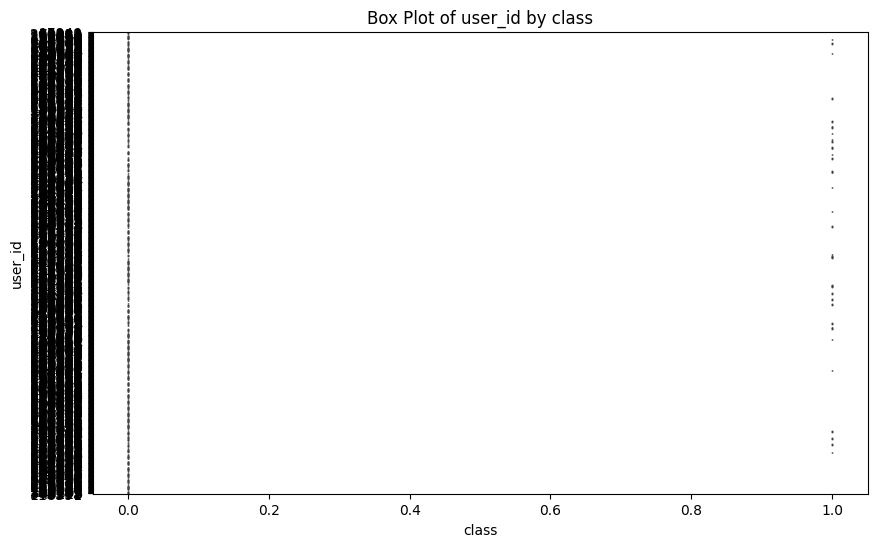

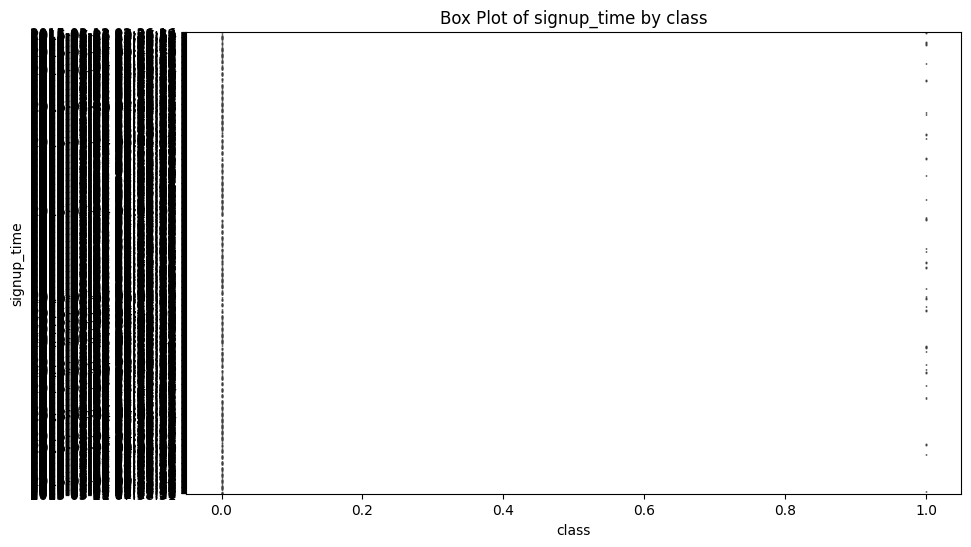

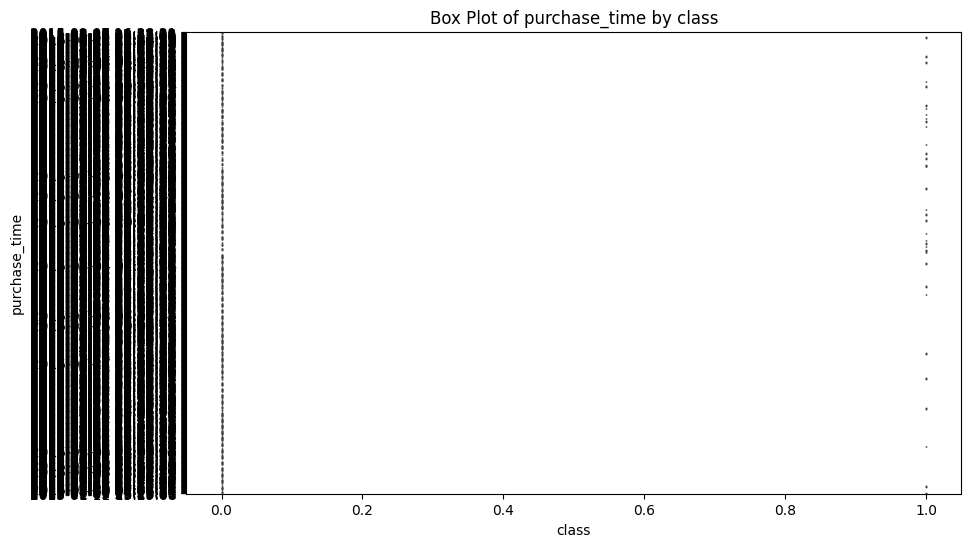

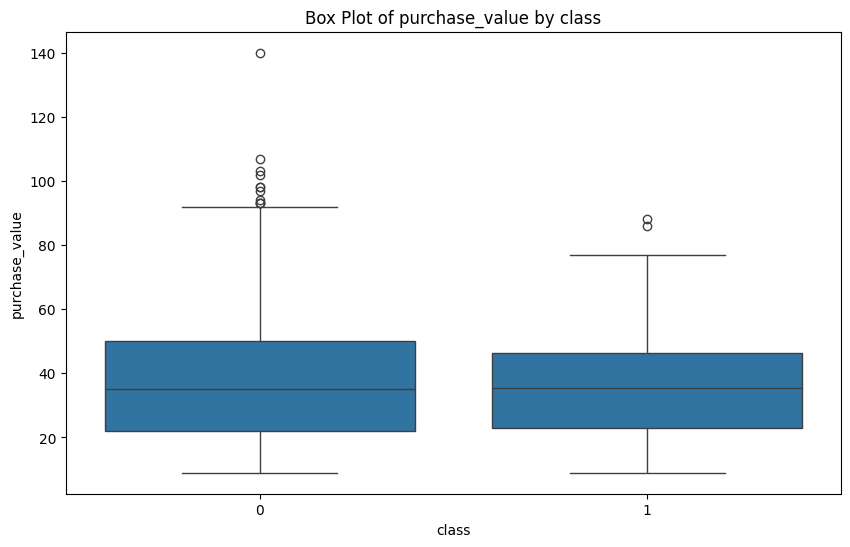

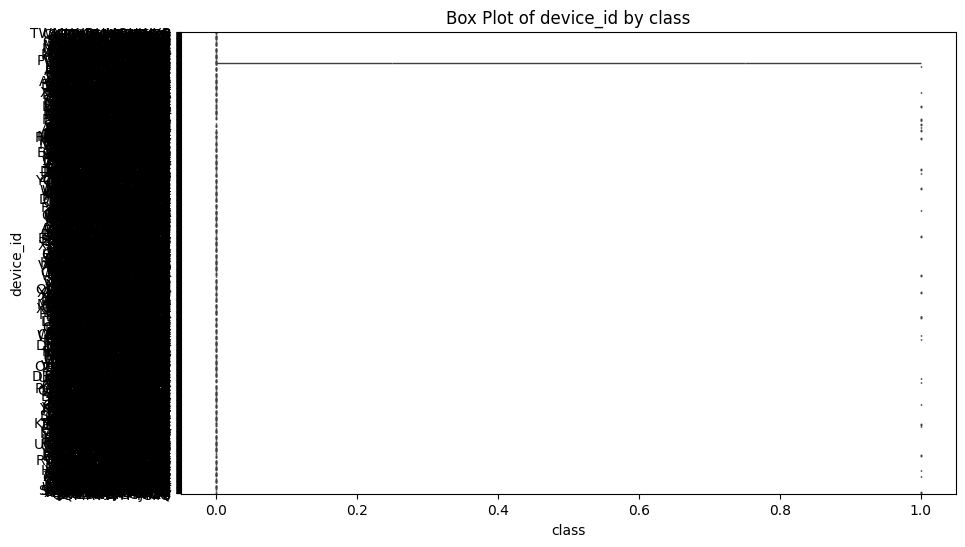

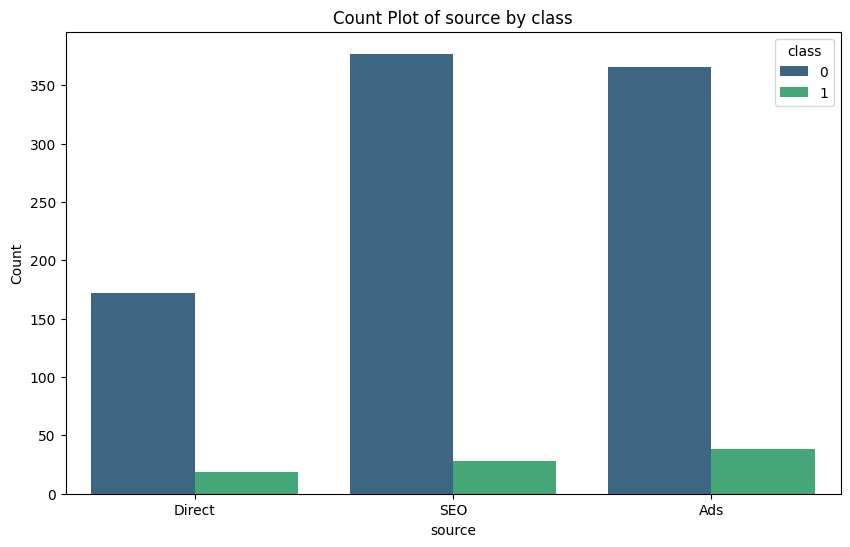

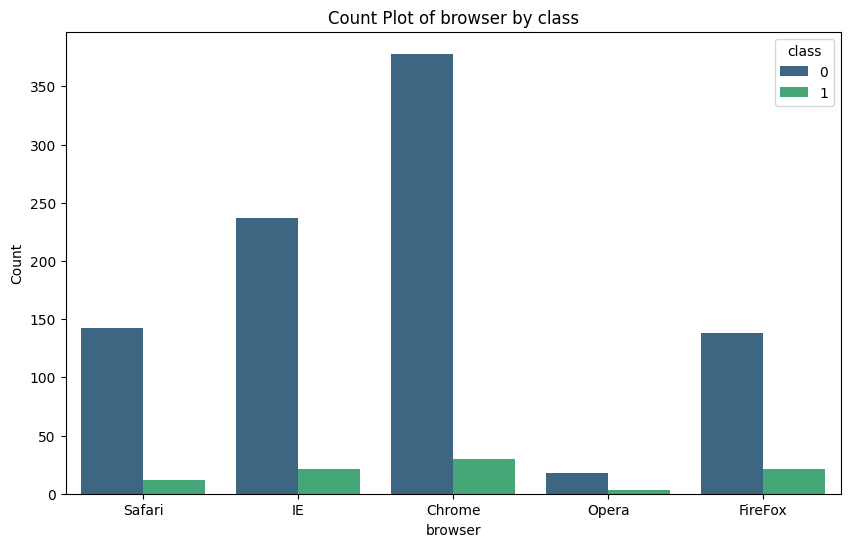

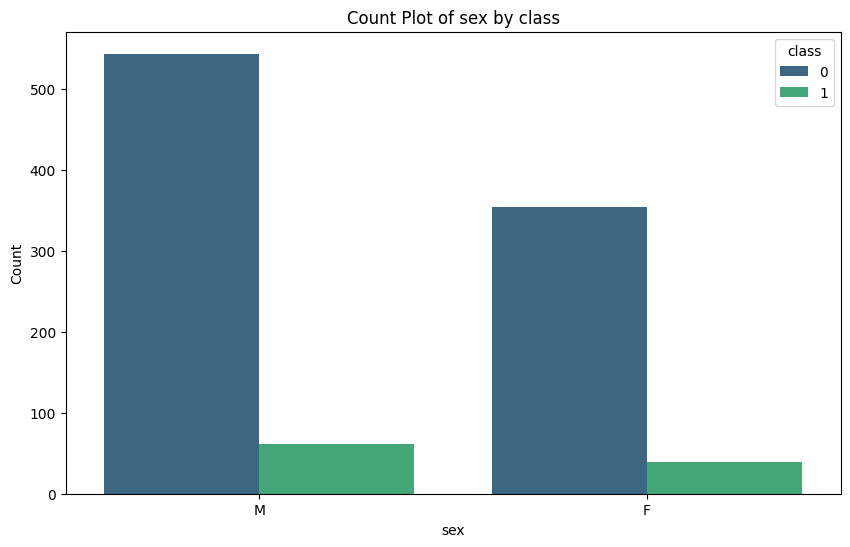

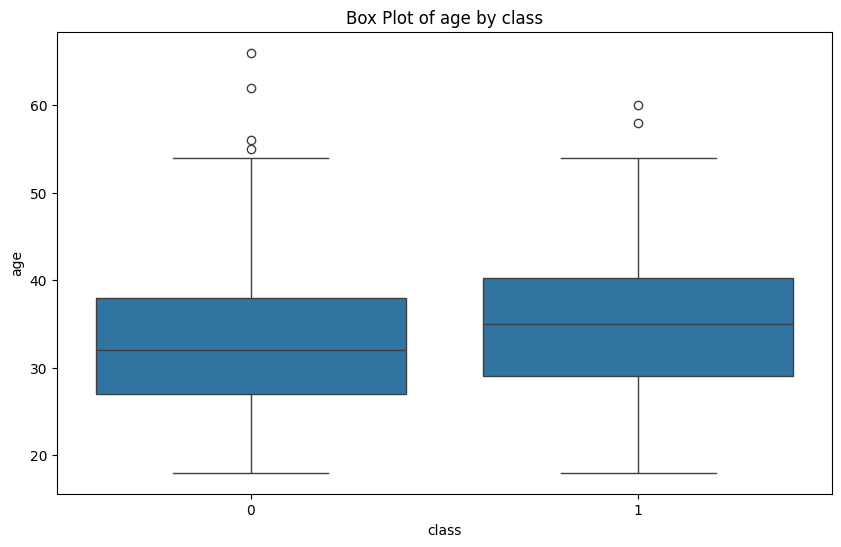

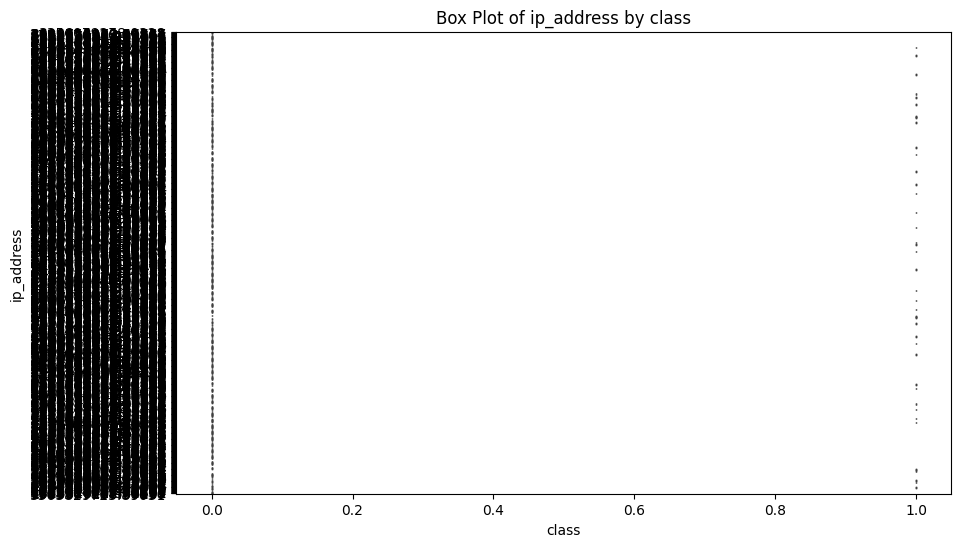

In [ ]:
# Define the target variable
target = 'class'
for column in df1.columns:
  unique_values = df1[column].unique()
  length = len(unique_values)
  if column == target:
    continue
  if length > 5:
    plot_box_violin_sample(df1, column, target, plot_type='box')
    # plot_box_violin(df1, column, target, plot_type='violin')
  else:
    plot_count_stacked_bar_sample(df1, column, target)
    # plot_stacked_bar_chart(df1, column, target)

In [ ]:
# Define the target variable
target = 'class'
for column in df1.columns:
  unique_values = df1[column].unique()
  length = len(unique_values)
  if column == target:
    continue
  if length > 5:
    plot_box_violin(df1, column, target, plot_type='box')
    # plot_box_violin(df1, column, target, plot_type='violin')
  else:
    plot_count_stacked_bar(df1, column, target)
    # plot_stacked_bar_chart(df1, column, target)

In [ ]:
summarize_data(df2)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
        lower_bound_ip_address  upper_bound_ip_address        country
count             1.388460e+05            1.388460e+05         138846
unique                     NaN                     NaN            235
top                        NaN                     NaN  United States
freq                       NaN                     NaN          46868
mean              2.724532e+09            2.724557e+09            NaN
std               8.975215e+08            8.974979e+08            NaN
min               1.677722e+07            1.

In [7]:
# Remove duplicates
df2.drop_duplicates(inplace=True)

Analysis for column: lower_bound_ip_address


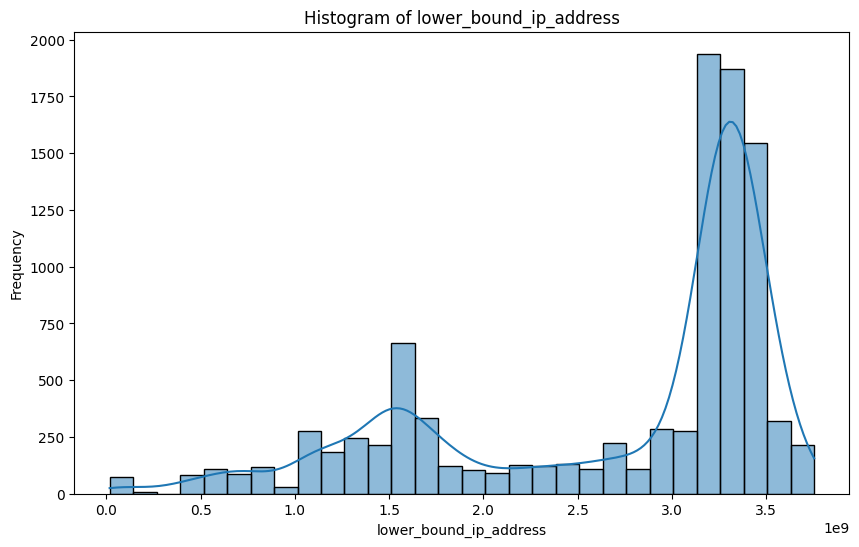




Analysis for column: upper_bound_ip_address


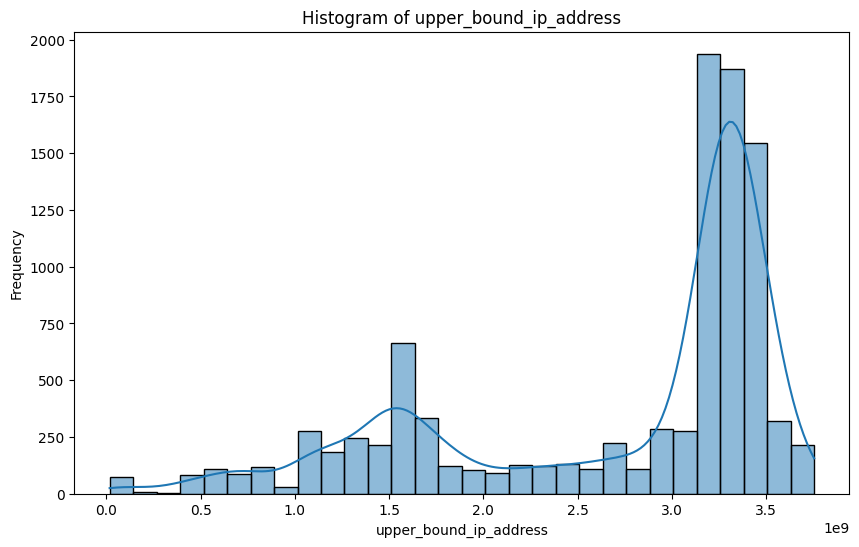




Analysis for column: country


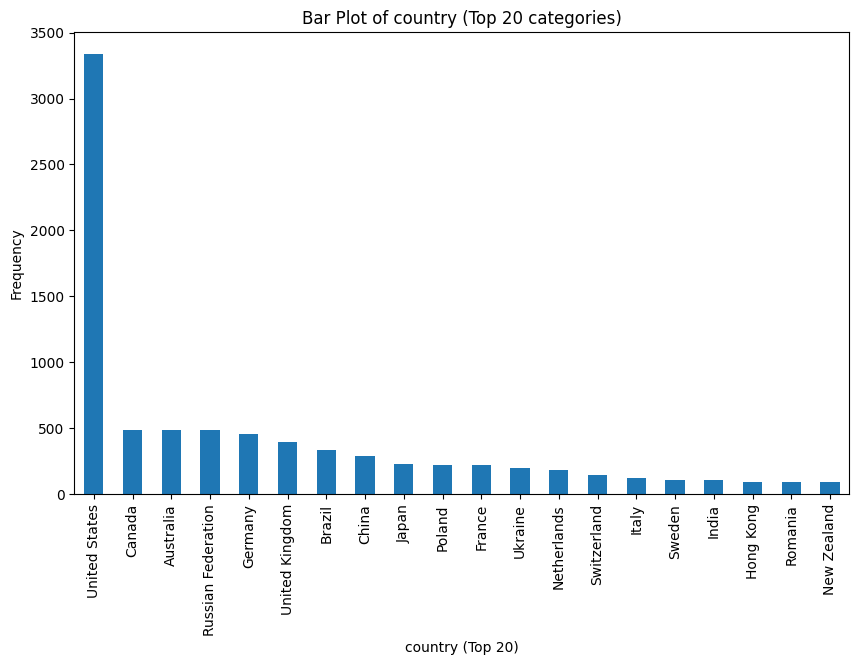

In [ ]:
univariate_analysis(df2)

In [ ]:
summarize_data(df3)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

# Merge Datasets for Geolocation Analysis

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  object        
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  float64       
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  object        
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 12.7+ MB


In [8]:
# Convert IP address columns to integer format
df1['ip_address'] = df1['ip_address'].astype(int)
df2['lower_bound_ip_address'] = df2['lower_bound_ip_address'].astype(int)
df2['upper_bound_ip_address'] = df2['upper_bound_ip_address'].astype(int)

# Merge the dataframes based on IP address range
merged_data = pd.merge_asof(
    df1.sort_values('ip_address'),
    df2.sort_values('lower_bound_ip_address'),
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter the merged dataframe to only include rows where the ip_address is within the range
merged_data = merged_data[
    (merged_data['ip_address'] >= merged_data['lower_bound_ip_address']) &
    (merged_data['ip_address'] <= merged_data['upper_bound_ip_address'])
]

# Drop unnecessary columns
merged_data = merged_data.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'])

# Display the merged dataframe
merged_data.sample(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
60804,229961,2015-07-22 05:20:22,2015-08-02 16:49:22,29.0,CTYKGIHFVDMQQ,Ads,IE,M,31,1729794889,0,Hong Kong
87459,217257,2015-04-20 15:52:41,2015-08-14 04:52:51,25.0,AOOKYSSTORMAO,Direct,Chrome,F,19,2483099760,0,United States
107162,157760,2015-07-13 06:23:01,2015-10-08 03:09:41,27.0,AYOIZTLUJAOFX,Direct,FireFox,M,41,3059576886,0,Japan
56265,110180,2015-06-17 03:25:54,2015-06-27 17:35:43,31.0,YYWECMIHPOIAG,Direct,Chrome,F,32,1588738343,0,Ukraine
3904,100387,2015-04-17 21:53:53,2015-07-28 19:16:13,33.0,AYYWEKTNLJRLQ,SEO,FireFox,M,34,107764522,0,United States


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 634 to 131728
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         129146 non-null  object        
 1   signup_time     129146 non-null  datetime64[ns]
 2   purchase_time   129146 non-null  datetime64[ns]
 3   purchase_value  129146 non-null  float64       
 4   device_id       129146 non-null  object        
 5   source          129146 non-null  object        
 6   browser         129146 non-null  object        
 7   sex             129146 non-null  object        
 8   age             129146 non-null  int64         
 9   ip_address      129146 non-null  int64         
 10  class           129146 non-null  int64         
 11  country         129146 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 12.8+ MB


In [ ]:
merged_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
country           0
dtype: int64

# Feature Engineering

In [9]:
# Hour of the day (0-23)
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour

# Day of the week (0=Monday, 6=Sunday)
merged_data['day_of_week'] = merged_data['purchase_time'].dt.dayofweek

# Count the number of transactions per user
merged_data['transaction_count'] = merged_data.groupby('user_id')['user_id'].transform('count')

In [10]:
# # Sort by user_id and purchase_time
# merged_data = merged_data.sort_values(by=['user_id', 'purchase_time'])

# # Calculate velocity (transactions within the past 24 hours)
# def calculate_velocity(user_merged_data):
#     time_diffs = (user_merged_data['purchase_time'] - user_merged_data['purchase_time'].shift(1)).dt.total_seconds() / 3600.0
#     user_merged_data['time_diff'] = time_diffs.fillna(9999)  # Assign a large number for the first transaction

#     velocity_24h = []
#     for i in range(len(user_merged_data)):
#         window = user_merged_data.iloc[max(0, i-24):i+1]  # Look back up to 24 hours
#         count = (window['time_diff'] < 24).sum()  # Count transactions within the past 24 hours
#         velocity_24h.append(count)

#     return pd.Series(velocity_24h, index=user_merged_data.index)

# merged_data['velocity_24h'] = merged_data.groupby('user_id').apply(calculate_velocity).reset_index(level=0, drop=True)
# Sort by user_id and purchase_time
merged_data = merged_data.sort_values(by=['user_id', 'purchase_time'])

# Calculate time difference in hours
merged_data['time_diff'] = merged_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds() / 3600.0

# Fill NaN values with a large number (since the first transaction has no previous transaction)
merged_data['time_diff'].fillna(9999, inplace=True)

In [ ]:
merged_data.sample(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour_of_day,day_of_week,transaction_count,time_diff
35483,267356,2015-07-18 17:18:39,2015-08-04 07:59:03,28.0,WOHGHQZXUCIIQ,Ads,Opera,F,31,1020805791,0,China,7,1,1,9999.0
81457,41211,2015-06-17 16:31:10,2015-10-07 11:21:02,57.0,DOOERHRYAFHTR,Ads,Chrome,M,29,2316403631,0,United States,11,2,1,9999.0
32944,250004,2015-06-09 11:02:08,2015-09-09 00:53:43,17.0,UDGJWKOZOMCYN,SEO,Chrome,M,41,934435471,0,United States,0,2,1,9999.0
28511,29604,2015-01-27 10:13:48,2015-04-21 17:29:28,12.0,OUYWLYNOPQPBM,SEO,IE,M,24,796235878,0,Canada,17,1,1,9999.0
13742,100843,2015-06-22 18:48:24,2015-09-12 12:49:11,11.0,BSKUJTWUDSAHC,SEO,Chrome,M,19,380681765,0,United States,12,5,1,9999.0


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 97191 to 81832
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            129146 non-null  object        
 1   signup_time        129146 non-null  datetime64[ns]
 2   purchase_time      129146 non-null  datetime64[ns]
 3   purchase_value     129146 non-null  float64       
 4   device_id          129146 non-null  object        
 5   source             129146 non-null  object        
 6   browser            129146 non-null  object        
 7   sex                129146 non-null  object        
 8   age                129146 non-null  int64         
 9   ip_address         129146 non-null  int64         
 10  class              129146 non-null  int64         
 11  country            129146 non-null  object        
 12  hour_of_day        129146 non-null  int32         
 13  day_of_week        129146 non-null  int32     

In [ ]:
merged_data.isnull().sum()

user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex                  0
age                  0
ip_address           0
class                0
country              0
hour_of_day          0
day_of_week          0
transaction_count    0
time_diff            0
dtype: int64

# Normalization and Scaling

In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select the features to scale
features_to_scale = ['purchase_value', 'age', 'transaction_count', 'hour_of_day', 'day_of_week']

# Fit and transform the features
merged_data[features_to_scale] = scaler.fit_transform(merged_data[features_to_scale])


In [ ]:
merged_data.sample(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour_of_day,day_of_week,transaction_count,time_diff
76633,66301,2015-06-28 19:12:27,2015-09-14 20:02:26,0.549607,XAXZYHPOXFCDA,SEO,Chrome,F,2.074410,2185149317,0,United States,1.229002,-1.501506,0.0,9999.0
18376,366852,2015-04-24 11:42:42,2015-06-11 00:29:16,-1.415703,DCPZDYRLVAEEX,Direct,Safari,M,-1.175636,505571477,0,United States,-1.665264,-0.006798,0.0,9999.0
116634,258147,2015-07-18 16:52:16,2015-08-28 11:18:36,0.058279,JFVFGMEETOVWK,Ads,FireFox,F,0.797606,3343886152,0,United States,-0.073418,0.491439,0.0,9999.0
29664,123516,2015-05-01 21:45:03,2015-06-22 14:31:41,-1.033559,COZERJGRJYMIY,SEO,Chrome,F,-0.247051,826560875,0,China,0.360722,-1.501506,0.0,9999.0
27154,273481,2015-07-19 21:22:58,2015-10-18 16:02:00,-0.706008,EJDAPRLJFGKSR,SEO,Chrome,M,-0.479197,745224593,0,United States,0.650149,1.487911,0.0,9999.0


# Encode Categorical Features

In [12]:
# Categorical features to encode
categorical_features = ['source', 'browser', 'sex', 'country']

# Initialize the LabelEncoder
label_encoders = {feature: LabelEncoder() for feature in categorical_features}

# Apply label encoding
for feature in categorical_features:
    merged_data[feature] = label_encoders[feature].fit_transform(merged_data[feature])

# Show the resulting DataFrame
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour_of_day,day_of_week,transaction_count,time_diff
97191,100,2015-05-10 05:05:40,2015-07-25 13:41:51,-0.542232,MDMLOWOGGANVG,1,0,1,0.333314,2776528971,1,171,0.216009,0.989675,0.0,9999.0
1918,10000,2015-08-15 22:47:50,2015-10-24 14:59:37,0.058279,JWYDAKVEKXUQJ,2,2,1,0.565460,51107169,0,171,0.360722,0.989675,0.0,9999.0
97635,100000,2015-05-06 01:04:25,2015-08-30 07:46:16,0.877158,TGOFJTSWBNTVD,0,2,1,1.610117,2788083697,0,171,-0.652271,1.487911,0.0,9999.0
47809,100002,2015-08-01 00:50:38,2015-11-14 00:44:48,-0.105497,KAPPLULTWGHCC,1,2,1,0.101168,1359403987,0,170,-1.665264,0.989675,0.0,9999.0
39385,100003,2015-01-27 05:43:43,2015-02-04 06:30:05,-1.142743,YQYYUYGQZBVZI,2,2,1,0.681533,1128757802,0,32,-0.796984,-0.505034,0.0,9999.0


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 97191 to 81832
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            129146 non-null  object        
 1   signup_time        129146 non-null  datetime64[ns]
 2   purchase_time      129146 non-null  datetime64[ns]
 3   purchase_value     129146 non-null  float64       
 4   device_id          129146 non-null  object        
 5   source             129146 non-null  int64         
 6   browser            129146 non-null  int64         
 7   sex                129146 non-null  int64         
 8   age                129146 non-null  float64       
 9   ip_address         129146 non-null  int64         
 10  class              129146 non-null  int64         
 11  country            129146 non-null  int64         
 12  hour_of_day        129146 non-null  float64       
 13  day_of_week        129146 non-null  float64   

#Task 2 - Model Building and Training
# Data Preparation

In [13]:
X = merged_data.drop('class', axis=1)  # Features
X.drop(columns=['signup_time', 'purchase_time','user_id', 'device_id'], inplace=True)
y = merged_data['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [16]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
]

# Model Training and Evaluation

In [19]:
best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append model name and performance metrics to the list
    model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()


    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy, "%")

Model: Random Forest
Test Accuracy: 0.9546651180797522
Precision: 0.9563689754816093
Recall: 0.9546651180797522
F1 Score: 0.9484149496132495

Model: Gradient Boosting
Test Accuracy: 0.9130855594270229
Precision: 0.9001975149414106
Recall: 0.9130855594270229
F1 Score: 0.8855751781542752

Model: Logistic Regression
Test Accuracy: 0.510956252419667
Precision: 0.8329371365929575
Recall: 0.510956252419667
F1 Score: 0.6066241551967847

Model: Decision Tree
Test Accuracy: 0.9236546651180797
Precision: 0.9173813462245093
Recall: 0.9236546651180797
F1 Score: 0.919706034341426

Best Model:
Test Accuracy: 0.9546651180797522
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))]) with accuracy 0.9546651180797522 %


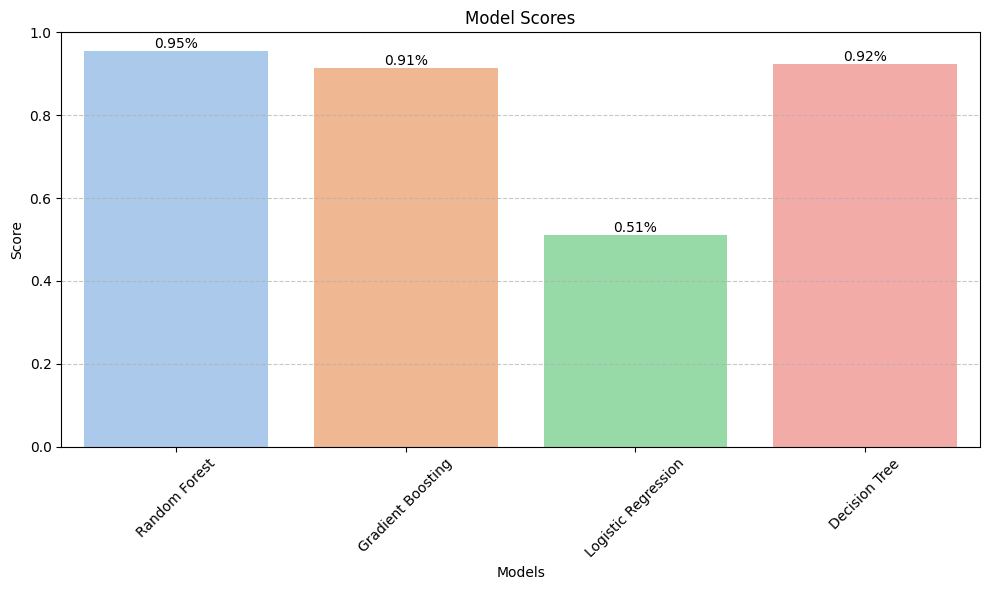

In [20]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

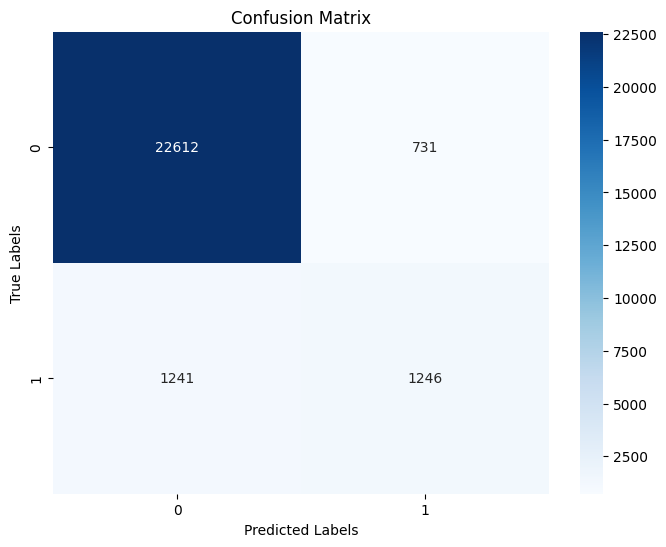

In [21]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Neural Network Models

In [22]:
%pip install tensorflow

In [1]:
!pip install scikeras

#MLP

In [31]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("MLP Test Accuracy:", accuracy)
print("MLP Precision:", precision)
print("MLP Recall:", recall)
print("MLP F1 Score:", f1)

MLP Test Accuracy: 0.9037166085946574
MLP Precision: 0.8167037086498292
MLP Recall: 0.9037166085946574
MLP F1 Score: 0.8580097530931644


#CNN

In [36]:
!pip install keras

In [ ]:
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv1D, Flatten, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have your dataset in X and y
# Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for CNN
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

def create_cnn():
    model = Sequential()
    model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('cnn', KerasClassifier(model=create_cnn, epochs=50, batch_size=32, verbose=0))
])

# Fit the pipeline on the training data
pipeline.fit(X_train_cnn, y_train)

# Make predictions on the test data
y_pred = (pipeline.predict(X_test_cnn) > 0.5).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the performance metrics
print("CNN Test Accuracy:", accuracy.round(3))
print("CNN Precision:", precision.round(3))
print("CNN Recall:", recall.round(3))
print("CNN F1 Score:", f1.round(3))


#RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def create_rnn():
    model = Sequential()
    model.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X_train_rnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('rnn', KerasClassifier(build_fn=create_rnn, epochs=50, batch_size=32, verbose=0))
])

pipeline.fit(X_train_rnn, y_train)
y_pred = (pipeline.predict(X_test_rnn) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("RNN Test Accuracy:", accuracy.round(3))
print("RNN Precision:", precision.round(3))
print("RNN Recall:", recall.round(3))
print("RNN F1 Score:", f1.round(3))


#LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def create_lstm():
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('lstm', KerasClassifier(build_fn=create_lstm, epochs=50, batch_size=32, verbose=0))
])

pipeline.fit(X_train_lstm, y_train)
y_pred = (pipeline.predict(X_test_lstm) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("LSTM Test Accuracy:", accuracy.round(3))
print("LSTM Precision:", precision.round(3))
print("LSTM Recall:", recall.round(3))
print("LSTM F1 Score:", f1.round(3))


#MLOps Steps

# Task 3 - Model Explainability
# Using SHAP for Explainability

# Using LIME for Explainability

#Task 4 - Model Deployment and API Development